Servo Project

In [46]:
#impoting libraries which will be required
import pandas as pd

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
from sklearn.linear_model import LinearRegression

In [88]:
from sklearn.metrics import r2_score,mean_absolute_error

In [50]:
#importing data
servo = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Servo%20Mechanism.csv')

In [51]:
#checking the data
servo.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [52]:
servo.columns


Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [70]:
servo.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [71]:
servo.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [68]:
#Separating target output from the inputs
X_train = servo[['Motor', 'Screw', 'Pgain', 'Vgain']]


In [73]:
X_train = servo.drop(['Class'],axis=1)

In [72]:
X_train

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


In [74]:
Y_train = servo['Class']

In [75]:
Y_train

,Class
0,4
1,11
2,6
3,48
4,6
...,...
162,44
163,40
164,25
165,44


In [76]:
#spliting the test and train
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,random_state=2529)

In [77]:
#selecting Model
model = LinearRegression()

In [79]:
model.fit(X_train,Y_train)

LinearRegression()

In [80]:
y_pred = model.predict(X_test)

In [91]:
error = r2_score(Y_test,y_pred)

In [92]:
Accuracy = 100 - error*100
print(f'Accuracy is = {Accuracy:.2f}%')

Accuracy is = 29.35%


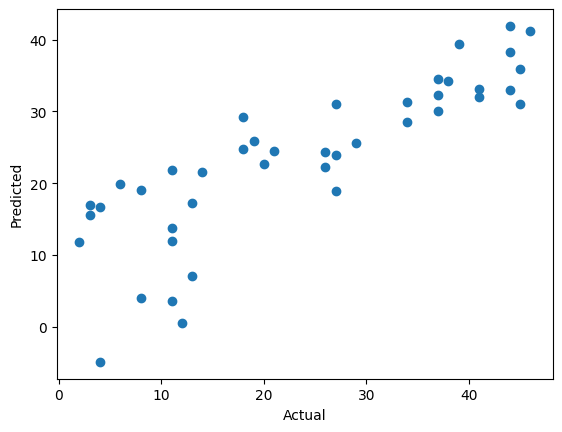

In [93]:
#visualizing
import matplotlib.pyplot as plt
plt.scatter(Y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [94]:
#new prediction
X_sample = servo.sample(1)

In [95]:
X_sample

,Motor,Screw,Pgain,Vgain,Class
8,2,0,6,5,19


In [96]:
X_sample = X_sample.drop(['Class'],axis=1)


In [97]:
X_sample

,Motor,Screw,Pgain,Vgain
8,2,0,6,5


In [98]:
y_pred_new = model.predict(X_sample)

In [102]:
y_pred_new

array([10.73104362])

In [105]:
error = (19-10.73)/19
error = error*100
print(f'Error = {error:.2f}%')

Error = 43.53%
